# 4.10 Coding Etiquette & Excel Reporting

## Contents

#### 1. Import libraries and data
#### 2. Consider security implications

#### 3. Compare customer behavior in different geographic areas
   ##### - 3.a Create a new column named 'region'
   ##### - 3.b Determine whether there is a difference in spending habits between the different U.S. regions
   
#### 4. Create an exclusion flag to exclude low-activity customers

#### 5. Create profiling variables
   ##### - 5.a Age
   ##### - 5.b Income
   ##### - 5.c Department
   ##### - 5.d Number of dependents
   
#### 6. Visualize the distributions of profiles
   ##### - 6.a Age groups
   ##### - 6.b Income groups
   ##### - 6.c Number of products ordered, by department
   ##### - 6.d Customers with dependents
   
#### 7. Basic statistics on customer-profile level for usage frequency and expenditure
   ##### - 7.a Age group
   ##### - 7.b Income group
   ##### - 7.c Dependents
   
#### 8. Comparison of customer profiles with regions and departments
   ##### - 8.a Age group - region
   ##### - 8.b Income group - region
   ##### - 8.c Dependents - region
   ##### - 8.d Age group - department
   ##### - 8.e Income group - department
   ##### - 8.f Dependents - department

#### 9. Additional Visualizations
   ##### - 9.a Distribution of prices and their frequency
   ##### - 9.b Order distribution related to brand loyalty
   ##### - 9.c Order distribution by family status and department
   ##### - 9.d Average order amount by age and family status
   ##### - 9.e Average order frequency by age and family status
   ##### - 9.f Age groups and income groups
   ##### - 9.g Age groups and loyalty
   ##### - 9.h Age groups and frequency of orders
   ##### - 9.i Orders by income groups
   ##### - 9.j Average order amount by income group
   ##### - 9.k Income Groups and Frequency of Orders



## 1. Import libraries and data

In [476]:
# Import analysis libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path variable for re-use when importing data.
path = r'C:\Users\sorca\Documents\Achievement_4\4_10'

In [4]:
# Create data frame with the latest merged data (from Exercise 4.9).
df_ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge_4_9.pkl'))

In [5]:
# Verify the number of rows in the newly created data frame.
df_ords_prods_cust_merge.shape

(32399732, 33)

In [6]:
# Verify data in the first five rows of the data frame.
df_ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,nbr_dependents,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# Note: Data frame was loaded correctly - it includes customer information.

## 2. Consider any security implications that might exist for this new data

In [9]:
# In our case, PII include values in the 'first_name' and 'last_name' columns - we need to drop these columns.
df_ords_prods_cust_merge = df_ords_prods_cust_merge.drop(['first_name', 'last_name'], axis=1)

In [10]:
# Verify the number of columns.
df_ords_prods_cust_merge.shape

(32399732, 31)

In [11]:
# Verify data in the first five rows of the data frame
df_ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,nbr_dependents,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low_spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [12]:
# The current number of columns is two less than the initial number of columns(33). This is correct.
# We can use 'user_id' column for customer specific analysis, now that we don't have first_name and last_name values in our data frame.

## Step 3. Compare customer behavior in different geographic areas.

#### 3.a  Create a new column named 'region' in the data frame and populate it.

In [15]:
# Create a list which will contain the regions
region_list = []

# Assign the regions based on the customer's state of residence
for state in df_ords_prods_cust_merge["state"]:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
                 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
                 'New Jersey']:
        region_list.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
                   'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
                   'Minnesota', 'Iowa', 'Missouri']:
        region_list.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
                   'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
                   'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region_list.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 
                   'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 
                   'California', 'Hawaii']:
        region_list.append("West")
    else:
        region_list.append("Unknown")


In [16]:
df_ords_prods_cust_merge['region'] = region_list

In [17]:
# Verify the number of rows, columns
df_ords_prods_cust_merge.shape

(32399732, 32)

In [18]:
# Verify the data in the first rows
df_ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,frequency_flag,gender,state,age,date_joined,nbr_dependents,fam_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [19]:
# The data above includes the column 'region' which is correctly populated.

#### 3.b  Determine whether there’s a difference in spending habits between the different U.S. regions.

In [21]:
# Crosstab region with the spending_flag
crosstab = pd.crosstab(df_ords_prods_cust_merge['region'], df_ords_prods_cust_merge['spending_flag'], dropna = False)

In [22]:
print(crosstab)

spending_flag  High_spender  Low_spender
region                                  
Midwest               29265      7566800
Northeast             18639      5703253
South                 40577     10749519
West                  31238      8260441


## Step 4. Create an exclusion flag for low-activity customers and exclude them from the data.

In [25]:
# Create an exclusion flag for customers with less than 5 orders.
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['max_order'] < 5, 'exclusion_flag'] = 'low-activity'

In [26]:
# Populate the exclusion flag for customers with more than 5 orders.
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['max_order'] >= 5, 'exclusion_flag'] = 'high-activity'

In [27]:
df_ords_prods_cust_merge['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
high-activity    30959687
low-activity      1440045
Name: count, dtype: int64

In [28]:
# The sum of the count of the high-activity and low activity customers equals to the number of rows of the original
# dataframe, meaning that the 'exclusion_flag' column was populated correctly.

In [29]:
# Populate the data frame only with high activity customers (and eliminate the low activity ones).
df_ords_prods_cust_merge_excl = df_ords_prods_cust_merge[df_ords_prods_cust_merge['exclusion_flag'] == 'high-activity']

In [30]:
# Verify the number of rows
df_ords_prods_cust_merge_excl.shape

(30959687, 33)

In [31]:
# Verify the data of the first 5 rows
df_ords_prods_cust_merge_excl.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,nbr_dependents,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity


In [32]:
# Export 'df_ords_prods_cust_merge_excl' data frame.
df_ords_prods_cust_merge_excl.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge_la_excl.pkl'))

## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

## 6. Create an appropriate visualization to show the distribution of profiles.

### 5.a Age

In [36]:
# Create an age group variable and populate with age categories
df_ords_prods_cust_merge_excl.loc[df_ords_prods_cust_merge_excl['age'] <= 25, 'age_group'] = 'young adult'
df_ords_prods_cust_merge_excl.loc[(df_ords_prods_cust_merge_excl['age'] > 25) & (df_ords_prods_cust_merge_excl['age'] <= 44), 'age_group'] = 'adult'
df_ords_prods_cust_merge_excl.loc[(df_ords_prods_cust_merge_excl['age'] > 44) & (df_ords_prods_cust_merge_excl['age'] <= 64), 'age_group'] = 'middle-aged'
df_ords_prods_cust_merge_excl.loc[df_ords_prods_cust_merge_excl['age'] > 64, 'age_group'] = 'elderly'


C:\Users\sorca\AppData\Local\Temp\ipykernel_33224\1581308583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merge_excl.loc[df_ords_prods_cust_merge_excl['age'] <= 25, 'age_group'] = 'young adult'


In [507]:
# Verify data
df_ords_prods_cust_merge_excl.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,nbr_dependents,fam_status,income,region,exclusion_flag,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income


In [509]:
# Get the counts for each age group
age_group_counts = df_ords_prods_cust_merge_excl['age_group'].value_counts(dropna = False)
# Verify data
age_group_counts

age_group
middle-aged    9688461
adult          9213092
elderly        8194267
young adult    3863867
Name: count, dtype: int64

### 6.a # Visualize the distribution of age groups

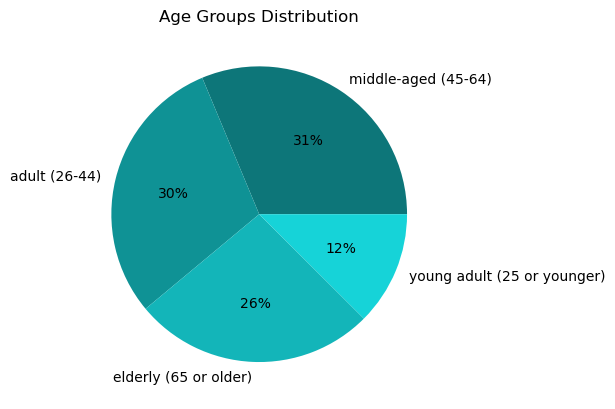

In [511]:
# Create a pie chart.
age_group_pie = age_group_counts.plot.pie(autopct='%1.0f%%', labels= ['middle-aged (45-64)', 'adult (26-44)', 'elderly (65 or older)', 'young adult (25 or younger)'], startangle=0, colors=['#0D7679','#0F9295','#13B5B9','#16D3D8'])
plt.title('Age Groups Distribution')
plt.ylabel('')
plt.show()

In [41]:
# Export age groups distribution pie chart
age_group_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_pie.png'))

### 5.b Income

In [44]:
# In order to determine the income bucket limits we will use the 25th and 75th percentiles.
df_ords_prods_cust_merge_excl['income'].describe()

count    3.095969e+07
mean     9.965502e+04
std      4.309143e+04
min      2.590300e+04
25%      6.728600e+04
50%      9.676100e+04
75%      1.280810e+05
max      5.939010e+05
Name: income, dtype: float64

In [45]:
# Create the income buckets
df_ords_prods_cust_merge_excl.loc[df_ords_prods_cust_merge_excl['income'] <= 67000, 'income_group'] = 'low-income'
df_ords_prods_cust_merge_excl.loc[(df_ords_prods_cust_merge_excl['income'] > 67000) & (df_ords_prods_cust_merge_excl['income'] <= 128000), 'income_group'] = 'middle-income'
df_ords_prods_cust_merge_excl.loc[df_ords_prods_cust_merge_excl['income'] > 128000, 'income_group'] = 'high-income'

C:\Users\sorca\AppData\Local\Temp\ipykernel_33224\4076935170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merge_excl.loc[df_ords_prods_cust_merge_excl['income'] <= 67000, 'income_group'] = 'low-income'


In [513]:
# Verify the data
df_ords_prods_cust_merge_excl['income_group'].value_counts(dropna = False)

income_group
middle-income    15549229
high-income       7748984
low-income        7661474
Name: count, dtype: int64

### 6.b Visualize the distribution of income groups

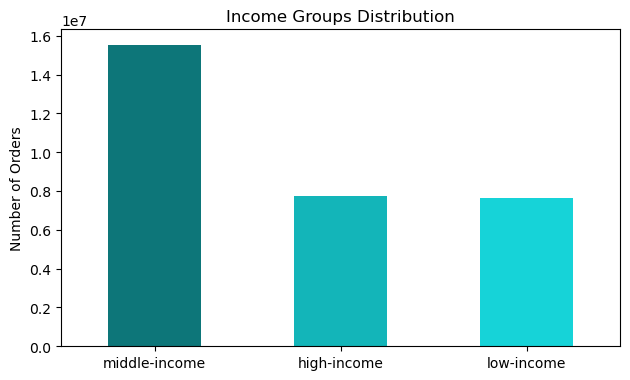

In [406]:
# Create a bar chart
income_group_bar = df_ords_prods_cust_merge_excl['income_group'].value_counts().plot.bar(color = ['#0D7679','#13B5B9','#16D3D8'])
plt.title('Income Groups Distribution')
plt.xlabel('')
plt.ylabel('Number of Orders')
# Adjust layout and export the chart
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig('income_group_bar.png', bbox_inches='tight', dpi=300)
plt.show()

### 5.c Department

In [51]:
# Import the department file
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [52]:
# Verify the data in the first 5 rows.
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [53]:
# Check the data types of the columns
df_dep.dtypes

department_id     int64
department       object
dtype: object

In [515]:
# Verify data
df_ords_prods_cust_merge_excl.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,nbr_dependents,fam_status,income,region,exclusion_flag,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income


In [55]:
# Merge df_ords_prods_cust_merge
df_ords_dep = df_ords_prods_cust_merge_excl.merge(df_dep, on = 'department_id', how = 'inner')

In [56]:
# Verify data in the first 5 rows
df_ords_dep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,nbr_dependents,fam_status,income,region,exclusion_flag,age_group,income_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income,dairy eggs
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income,snacks
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income,snacks
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,31,2/17/2019,3,married,40423,South,high-activity,adult,low-income,household


In [57]:
# Exporting df_ords_dep data frame as it has the most complete data so far. 
df_ords_dep.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

### 6c. Visualize the number of products ordered, by Department

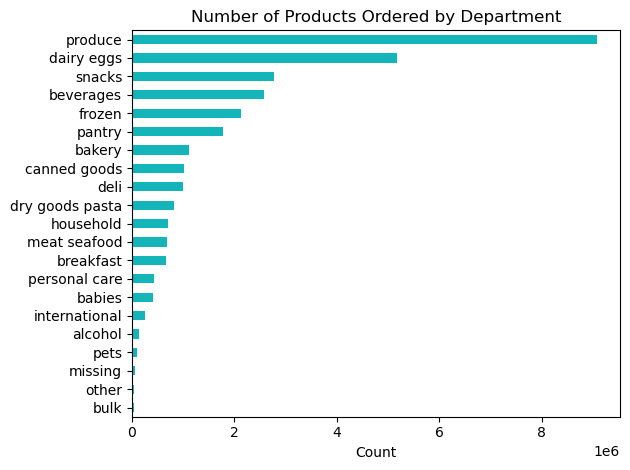

In [59]:
# Create a horizontal bar chart
ords_depts_bar = df_ords_dep['department'].value_counts(ascending=True).plot(kind='barh', color='#13B5B9', xlabel = 'Count', title='Number of Products Ordered by Department')

# Adjust layout and export the chart
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.savefig('orders_products_customers_departments.png', bbox_inches='tight', dpi=300)
plt.show()

### 5.d Dependents

In [61]:
# Create a new 'dependents_flag' column and populate it
df_ords_dep.loc[df_ords_dep['nbr_dependents'] == 0, 'dependents_flag'] = 'no dependents'
df_ords_dep.loc[df_ords_dep['nbr_dependents'] >= 1, 'dependents_flag'] = 'has dependents'

In [62]:
# Verify the number of rows, columns
df_ords_dep.shape

(30959687, 37)

In [63]:
# Check the data in the first 5 rows
df_ords_dep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,nbr_dependents,fam_status,income,region,exclusion_flag,age_group,income_group,department,dependents_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,high-activity,adult,low-income,beverages,has dependents
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,South,high-activity,adult,low-income,dairy eggs,has dependents
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,2/17/2019,3,married,40423,South,high-activity,adult,low-income,snacks,has dependents
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,South,high-activity,adult,low-income,snacks,has dependents
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2/17/2019,3,married,40423,South,high-activity,adult,low-income,household,has dependents


### 6d. Visualize the influence of dependents on the products ordered

In [65]:
# # Get the counts for the dependents flag values
dependents_group_counts = df_ords_dep['dependents_flag'].value_counts(dropna = False)
dependents_group_counts

dependents_flag
has dependents    23221179
no dependents      7738508
Name: count, dtype: int64

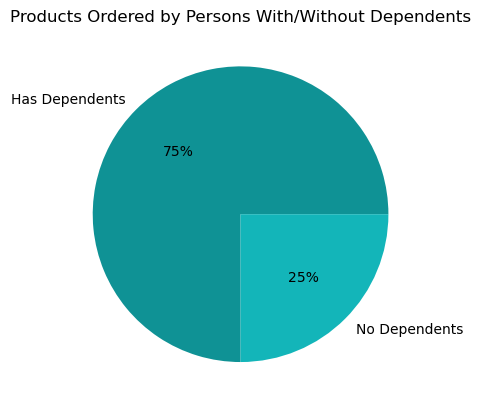

In [66]:
# Will use a pie chart to see the percentage of orders placed by persons who have dependents
dependents_group_pie = dependents_group_counts.plot.pie(autopct='%1.0f%%', labels= ['Has Dependents', 'No Dependents'], startangle=0, colors=['#0F9295','#13B5B9'])
plt.title('Products Ordered by Persons With/Without Dependents')
plt.ylabel('')
plt.show()

In [67]:
# Export the pie chart
dependents_group_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_group_pie.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [517]:
# Reminder with the columns included in the data frame
df_ords_dep.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price_all_orders', 'spending_flag', 'order_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'nbr_dependents', 'fam_status', 'income', 'region', 'exclusion_flag',
       'age_group', 'income_group', 'department', 'dependents_flag'],
      dtype='object')

In [70]:
# Create a subset for aggregation
customer_profile = df_ords_dep.groupby(['user_id','order_number','loyalty_flag','spending_flag','region','age_group','income_group','fam_status','dependents_flag','days_since_prior_order'])['prices'].sum().reset_index()

In [71]:
# Verify the data in the first 5 rows
customer_profile.head()

,user_id,order_number,loyalty_flag,spending_flag,region,age_group,income_group,fam_status,dependents_flag,days_since_prior_order,prices
0,1,2,New customer,Low_spender,South,adult,low-income,married,has dependents,15.0,35.4
1,1,3,New customer,Low_spender,South,adult,low-income,married,has dependents,21.0,28.2
2,1,4,New customer,Low_spender,South,adult,low-income,married,has dependents,29.0,26.0
3,1,5,New customer,Low_spender,South,adult,low-income,married,has dependents,28.0,57.0
4,1,6,New customer,Low_spender,South,adult,low-income,married,has dependents,19.0,25.0


In [72]:
# Rename 'prices' column to 'order_total'
customer_profile.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [73]:
# Verify the data in the first 5 rows
customer_profile.head()

,user_id,order_number,loyalty_flag,spending_flag,region,age_group,income_group,fam_status,dependents_flag,days_since_prior_order,order_total
0,1,2,New customer,Low_spender,South,adult,low-income,married,has dependents,15.0,35.4
1,1,3,New customer,Low_spender,South,adult,low-income,married,has dependents,21.0,28.2
2,1,4,New customer,Low_spender,South,adult,low-income,married,has dependents,29.0,26.0
3,1,5,New customer,Low_spender,South,adult,low-income,married,has dependents,28.0,57.0
4,1,6,New customer,Low_spender,South,adult,low-income,married,has dependents,19.0,25.0


### 7.a Age Group

In [519]:
# Basic statistics for days_since_prior_order and order_total by age group
customer_profile.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']})

days_since_prior_order            order_total             
                              mean  min   max        mean  min     max
age_group                                                             
adult                    10.403740  0.0  30.0   79.016010  1.0   829.2
elderly                  10.372173  0.0  30.0   78.367220  1.0   751.1
middle-aged              10.382161  0.0  30.0   78.510544  1.0  1092.2
young adult              10.380595  0.0  30.0   78.871788  1.0   842.1

### 7.b Income Group

In [521]:
# Basic statistics for days_since_prior_order and order_total by income group
customer_profile.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']})

days_since_prior_order            order_total             
                                mean  min   max        mean  min     max
income_group                                                            
high-income                10.241524  0.0  30.0   83.800320  1.0  1047.4
low-income                 10.732518  0.0  30.0   65.295467  1.0   875.0
middle-income              10.256798  0.0  30.0   83.849425  1.0  1092.2

### 7.c Dependents

In [523]:
# Basic statistics for days_since_prior_order and order_total by dependents flag
customer_profile.groupby('dependents_flag').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']})

days_since_prior_order            order_total             
                                  mean  min   max        mean  min     max
dependents_flag                                                           
has dependents               10.388232  0.0  30.0   78.728823  1.0  1092.2
no dependents                10.378144  0.0  30.0   78.482647  1.0   875.0

In [80]:
# Exporting 'customer_profile' data frame. 
customer_profile.to_pickle(os.path.join(path,'02 Data','Prepared Data','customer_profile.pkl'))

## 8. Compare your customer profiles with regions and departments

#### 8.a Age group - region comparison

In [83]:
# Create crosstabs for 'region', 'age_group' counting unique order_id
age_group_region = df_ords_dep.groupby(['region', 'age_group'])['order_id'].nunique().unstack(fill_value=0)

In [525]:
# Verify data
age_group_region.head()

age_group,region,adult,elderly,middle-aged,young adult
0,Midwest,214278,189588,227166,88258
1,Northeast,159022,145241,168821,67109
2,South,303637,272029,316490,129218
3,West,231049,207843,248068,96541


In [85]:
# Resetting index to use in plotting
age_group_region = age_group_region.reset_index()

<Figure size 1000x600 with 0 Axes>

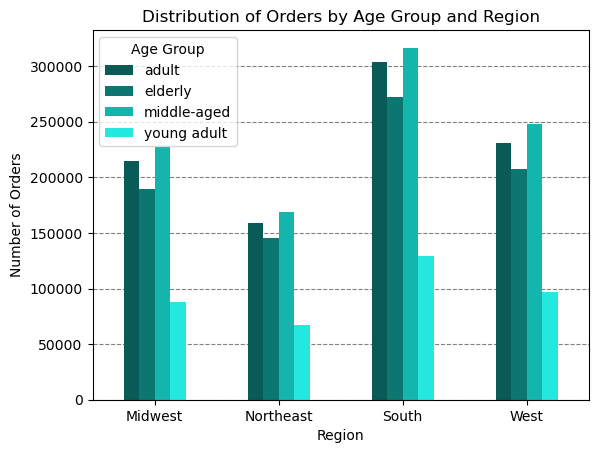

In [86]:
# Create a bar chart for age group and region comparison
plt.figure(figsize=(10, 6))

# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD','#24E8DF']
# Create the actual bar plot
age_group_region.plot(x='region', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Distribution of Orders by Age Group and Region')
plt.ylabel('Number of Orders')
plt.xlabel('Region')
plt.legend(title='Age Group', fontsize=10)
plt.xticks(rotation=0)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_by_region_bar.png'), bbox_inches = 'tight')
plt.show()

#### 8.b Income group - region comparison

In [88]:
# Create crosstabs for 'region', 'income_group' counting unique order_id
income_group_region = df_ords_dep.groupby(['region', 'income_group'])['order_id'].nunique().unstack(fill_value=0)

In [89]:
income_group_region.head()

income_group,high-income,low-income,middle-income
region,,,
Midwest,175859,197770,345661
Northeast,129126,151675,259392
South,242355,287191,491828
West,186898,219873,376730


In [90]:
# Resetting index to use in plotting
income_group_region = income_group_region.reset_index()

<Figure size 1000x600 with 0 Axes>

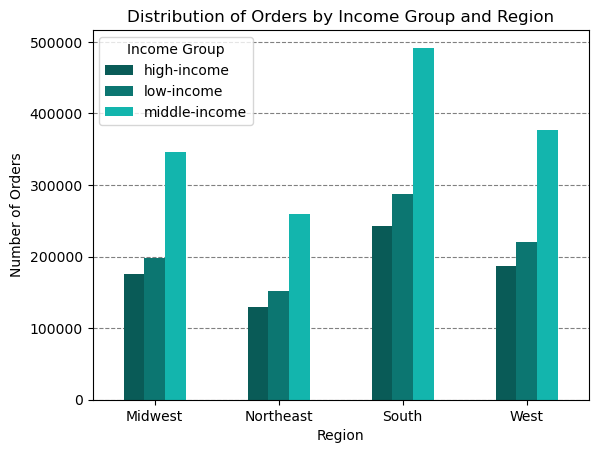

In [91]:
# Create a bar chart for income group and region comparison
plt.figure(figsize=(10, 6))
# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD']
# Create the actual bar plot
income_group_region.plot(x='region', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Distribution of Orders by Income Group and Region')
plt.ylabel('Number of Orders')
plt.xlabel('Region')
plt.legend(title='Income Group', fontsize=10)
plt.xticks(rotation=0)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'income_by_region_bar.png'), bbox_inches = 'tight')
plt.show()

#### 8.c Dependents - region comparison

In [93]:
# Create crosstabs for 'region', 'dependents_flag' counting unique order_id
dependents_region = df_ords_dep.groupby(['region', 'dependents_flag'])['order_id'].nunique().unstack(fill_value=0)

In [527]:
# Verify data
dependents_region.head()

dependents_flag,region,has dependents,no dependents
0,Midwest,538732,180558
1,Northeast,404126,136067
2,South,766137,255237
3,West,587614,195887


In [95]:
# Resetting index to use in plotting
dependents_region = dependents_region.reset_index()

<Figure size 1000x600 with 0 Axes>

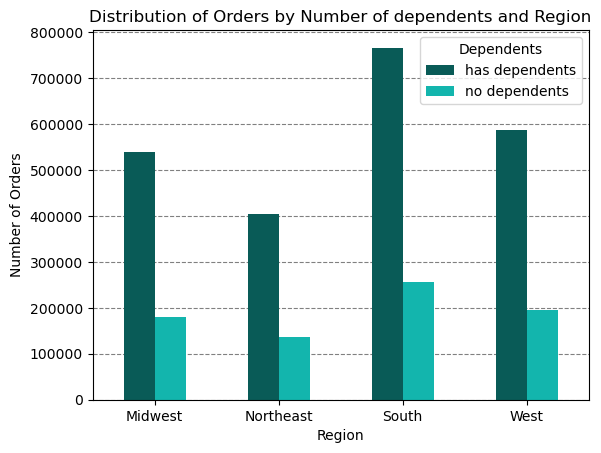

In [96]:
# Create a bar chart for dependents and region comparison
plt.figure(figsize=(10, 6))

# Create a color palette
custom_palette = ['#095B57','#13B5AD']
# Create the actual bar plot
dependents_region.plot(x='region', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Distribution of Orders by Number of dependents and Region')
plt.ylabel('Number of Orders')
plt.xlabel('Region')
plt.legend(title='Dependents', fontsize=10)
plt.xticks(rotation=0)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'orders_dependents_by_region_bar.png'), bbox_inches = 'tight')
plt.show()

#### 8.d Age group - department comparison

In [98]:
# Create crosstabs for 'department', 'age_group' counting unique order_id
age_group_dept = df_ords_dep.groupby(['department', 'age_group'])['order_id'].nunique().unstack(fill_value=0)

In [529]:
# Verify data
age_group_dept.head()

age_group,department,adult,elderly,middle-aged,young adult
0,alcohol,23175,20736,25356,10388
1,babies,51264,45017,54557,21263
2,bakery,250124,221143,263487,104454
3,beverages,410370,370488,437682,172964
4,breakfast,147841,130351,156135,63041


In [100]:
# Resetting index to use in plotting
age_group_dept = age_group_dept.reset_index()

<Figure size 100000x2000 with 0 Axes>

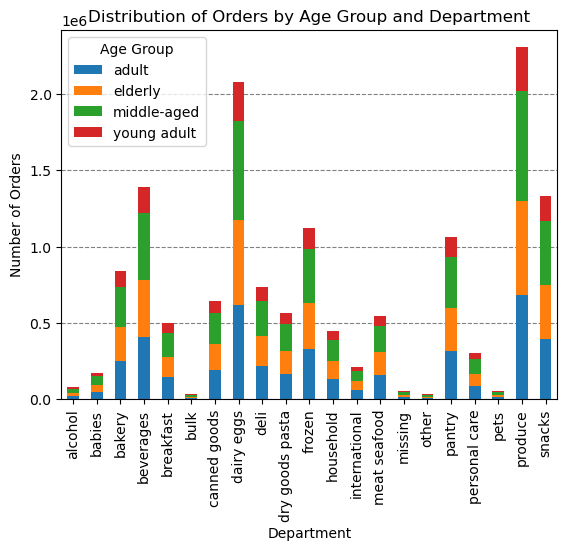

In [101]:
# Create a bar chart for age group and department comparison
plt.figure(figsize=(1000, 20))

# Create the actual bar plot
age_group_dept.plot(x='department', kind='bar', stacked=True)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Distribution of Orders by Age Group and Department')
plt.ylabel('Number of Orders')
plt.xlabel('Department')
plt.legend(title='Age Group', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_by_dept.png'), bbox_inches = 'tight')
plt.show()

#### 8.e Income group - department comparison

In [103]:
# Create crosstabs for 'department', 'income_group' counting unique order_id
income_group_dept = df_ords_dep.groupby(['department', 'income_group'])['order_id'].nunique().unstack(fill_value=0)

In [104]:
# Verify data
income_group_dept.head()

income_group,high-income,low-income,middle-income
department,,,
alcohol,22990,19816,36849
babies,44956,36254,90891
bakery,215905,197711,425592
beverages,335255,393330,662919
breakfast,121327,135288,240753


In [105]:
# Resetting index to use in plotting
income_group_dept = income_group_dept.reset_index()

<Figure size 100000x2000 with 0 Axes>

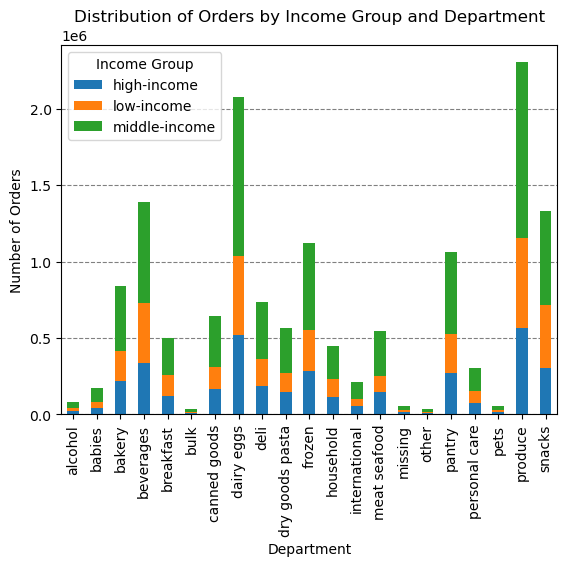

In [106]:
# Create a stacked bar chart for income group and department comparison
plt.figure(figsize=(1000, 20))

# Create the actual bar plot
income_group_dept.plot(x='department', kind='bar', stacked=True)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Distribution of Orders by Income Group and Department')
plt.ylabel('Number of Orders')
plt.xlabel('Department')
plt.legend(title='Income Group', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'income_by_dept.png'), bbox_inches = 'tight')
plt.show()

#### 8.f Dependents - department comparison

In [108]:
# Create crosstabs for 'department', 'dependents_flag' counting unique order_id
dependents_dept = df_ords_dep.groupby(['department', 'dependents_flag'])['order_id'].nunique().unstack(fill_value=0)

In [531]:
# Verify data
dependents_dept.head()

dependents_flag,department,has dependents,no dependents
0,alcohol,59465,20190
1,babies,129037,43064
2,bakery,628985,210223
3,beverages,1043185,348319
4,breakfast,373355,124013


In [110]:
# Resetting index to use in plotting
dependents_dept = dependents_dept.reset_index()

<Figure size 100000x2000 with 0 Axes>

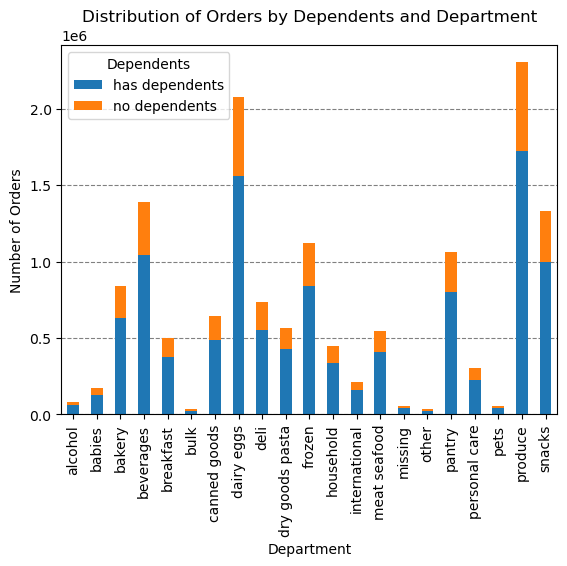

In [111]:
# Create a stacked bar chart for dependents and department comparison
plt.figure(figsize=(1000, 20))

# Create the actual bar plot
dependents_dept.plot(x='department', kind='bar', stacked=True)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Distribution of Orders by Dependents and Department')
plt.ylabel('Number of Orders')
plt.xlabel('Department')
plt.legend(title='Dependents', fontsize=10)
# plt.xticks(rotation=0)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'dependents_by_dept.png'), bbox_inches = 'tight')
plt.show()

In [112]:
# Save the data with the latest flags
df_ords_dep.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_dept_dep.pkl'))

## 9. Additional Visualizations

### 9.a Distribution of Prices and Their Frequency

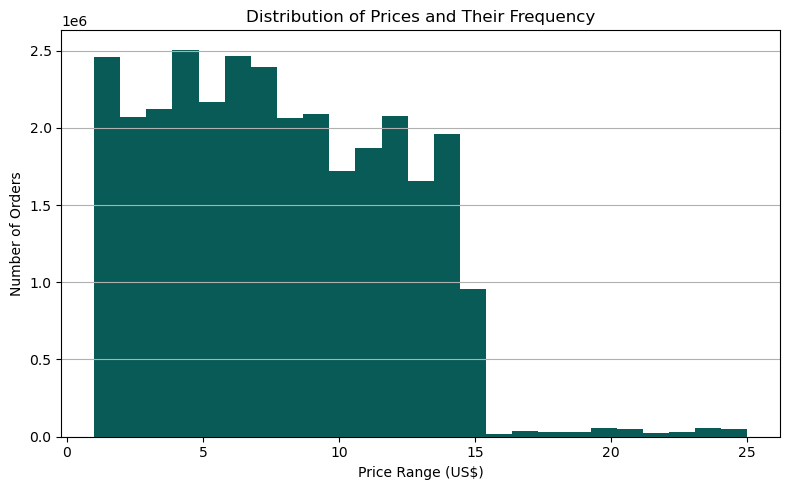

In [535]:
# Create a histogram for the 'prices' column
hist_prices = df_ords_prods_cust_merge_excl['prices'].plot.hist(bins=25, figsize=(8, 5), color = '#095B57')

# Adding a title and labels
plt.title('Distribution of Prices and Their Frequency')
plt.xlabel('Price Range (US$)')
plt.ylabel('Number of Orders')
plt.grid(axis='y')

# Adjust layout
plt.tight_layout()

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'distribution_of_prices.png'), bbox_inches = 'tight')
plt.show()

### 9.b Order Distribution Related to Brand Loyalty

In [117]:
# Create a data frame with the number of customers per loyalty group
Users_loyalty = df_ords_prods_cust_merge_excl.groupby(['loyalty_flag'])['user_id'].nunique()

In [118]:
# Verify data
Users_loyalty.head()

loyalty_flag
Loyal customer      17017
New customer        68750
Regular customer    76864
Name: user_id, dtype: int64

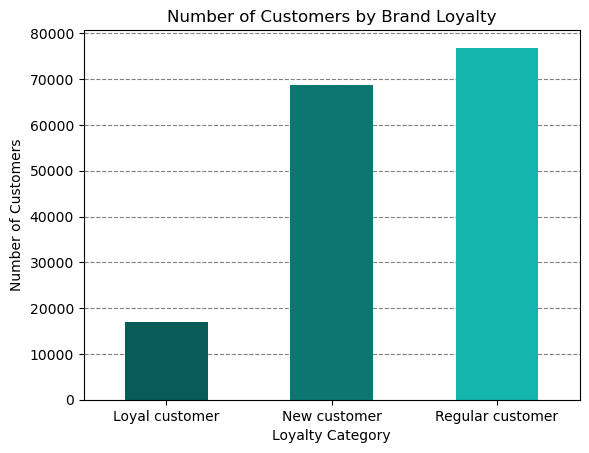

In [119]:
# Create the actual bar plot
custom_palette = ['#095B57','#0C7671','#13B5AD']
Users_loyalty.plot(x='loyalty_flag', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Number of Customers by Brand Loyalty')
plt.ylabel('Number of Customers')
plt.xlabel('Loyalty Category')
plt.xticks(rotation=0)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Users and Loyalty.png'), bbox_inches = 'tight')
plt.show()

### 9.c Order Distribution by Family Status and Department

In [121]:
# Create crosstabs for 'department', 'fam_status' counting unique order_id
fam_status_dept = df_ords_dep.groupby(['department', 'fam_status'])['order_id'].nunique().unstack(fill_value=0)

In [122]:
# Verify data
fam_status_dept.head()

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,6624,4463,55002,13566
babies,14476,8167,120870,28588
bakery,71262,40307,588678,138961
beverages,118562,65486,977699,229757
breakfast,42259,24447,348908,81754


In [123]:
# Resetting index to use in plotting
fam_status_dept = fam_status_dept.reset_index()

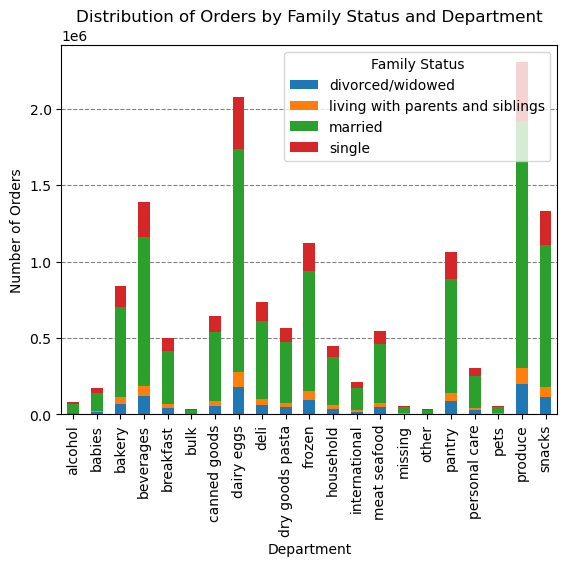

In [124]:
# Create a bar chart for family status and department comparison
# Create the actual bar plot
fam_status_dept.plot(x='department', kind='bar', stacked=True)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Distribution of Orders by Family Status and Department')
plt.ylabel('Number of Orders')
plt.xlabel('Department')
plt.legend(title='Family Status', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'fam_status_by_dept.png'), bbox_inches = 'tight')
plt.show()

### 9.d Average Order Amount by Age and Family Status

In [127]:
# First create a data frame which has the total amount of each order
order_amount_cust = df_ords_dep.groupby(['user_id','order_number','loyalty_flag','spending_flag','region','age_group','income','fam_status','nbr_dependents','days_since_prior_order'])['prices'].sum().reset_index()

In [128]:
# Rename 'prices' column to 'order_total'.
order_amount_cust.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [129]:
# Verify the data
order_amount_cust.head()

,user_id,order_number,loyalty_flag,spending_flag,region,age_group,income,fam_status,nbr_dependents,days_since_prior_order,order_total
0,1,2,New customer,Low_spender,South,adult,40423,married,3,15.0,35.4
1,1,3,New customer,Low_spender,South,adult,40423,married,3,21.0,28.2
2,1,4,New customer,Low_spender,South,adult,40423,married,3,29.0,26.0
3,1,5,New customer,Low_spender,South,adult,40423,married,3,28.0,57.0
4,1,6,New customer,Low_spender,South,adult,40423,married,3,19.0,25.0


In [130]:
# Create a data frame with data grouped by 'fam_status' and 'age_group' which shows the mean total amount of the orders
ords_total_age_fam_status = order_amount_cust.groupby(['fam_status','age_group'])['order_total'].mean().unstack(fill_value=0)

In [131]:
# Verify data
ords_total_age_fam_status.head()

age_group,adult,elderly,middle-aged,young adult
fam_status,,,,
divorced/widowed,0.000000,78.461762,80.513684,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,79.416970
married,79.187631,78.336262,78.458815,78.893178
single,78.507646,0.000000,78.050774,78.003530


In [132]:
# Reset the index
ords_total_age_fam_status = ords_total_age_fam_status.reset_index()

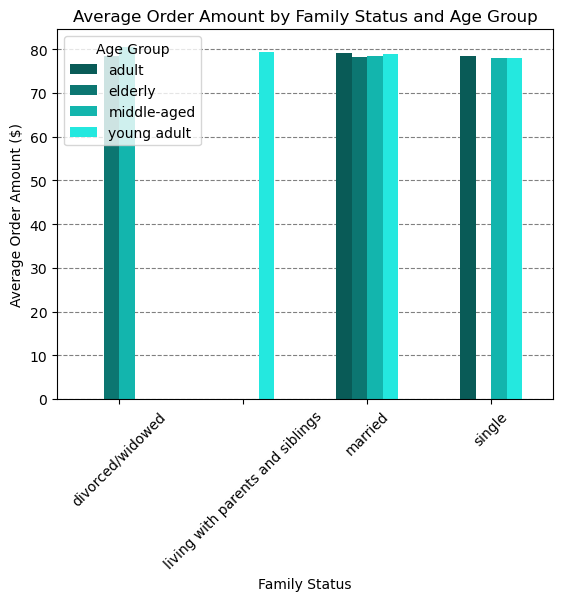

In [539]:
# Create a bar chart for age group and family status comparison
# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD','#24E8DF']
# Create the actual bar plot
ords_total_age_fam_status.plot(x='fam_status', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Average Order Amount by Family Status and Age Group')
plt.ylabel('Average Order Amount ($)')
plt.xlabel('Family Status')
plt.xticks(rotation=45)
plt.legend(title='Age Group', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'avg_ord_amt_fam_status_age.png'), bbox_inches = 'tight')
plt.show()

### 9.e Average Order Frequency by Age and Family Status

In [135]:
# Create a data frame with data grouped by 'fam_status' and 'age_group' which shows the average frequency of the orders
freq_ords_age_fam_status = order_amount_cust.groupby(['fam_status','age_group'])['days_since_prior_order'].mean().unstack(fill_value=0)

In [136]:
# Verify data
freq_ords_age_fam_status.head()

age_group,adult,elderly,middle-aged,young adult
fam_status,,,,
divorced/widowed,0.000000,10.367128,10.304894,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,10.301481
married,10.401867,10.373826,10.411189,10.357927
single,10.409289,0.000000,10.293534,10.535649


In [137]:
# Reset the index
freq_ords_age_fam_status = freq_ords_age_fam_status.reset_index()

In [138]:
freq_ords_age_fam_status.head()

age_group,fam_status,adult,elderly,middle-aged,young adult
0,divorced/widowed,0.000000,10.367128,10.304894,0.000000
1,living with parents and siblings,0.000000,0.000000,0.000000,10.301481
2,married,10.401867,10.373826,10.411189,10.357927
3,single,10.409289,0.000000,10.293534,10.535649


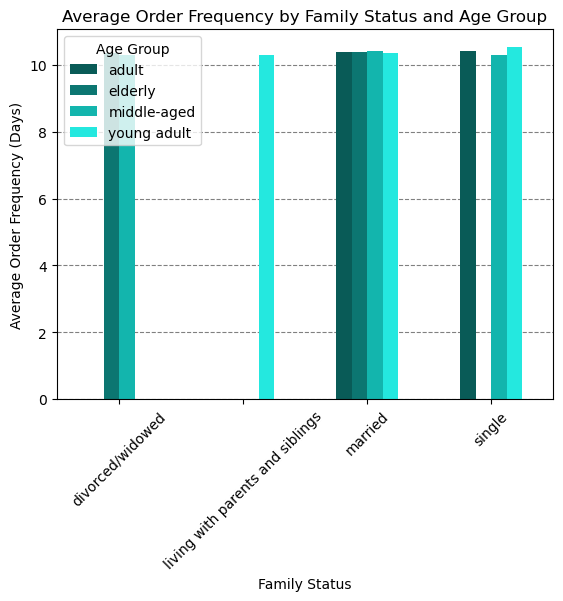

In [537]:
# Create a bar chart for age group and family status comparison
# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD','#24E8DF']
# Create the actual bar plot
freq_ords_age_fam_status.plot(x='fam_status', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Average Order Frequency by Family Status and Age Group')
plt.ylabel('Average Order Frequency (Days)')
plt.xlabel('Family Status')
plt.xticks(rotation=45)
plt.legend(title='Age Group', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'avg_freq_ords_fam_status_age.png'), bbox_inches = 'tight')
plt.show()

### 9.f Age Groups and Income Groups

In [366]:
# Create crosstabs for 'age_group', 'income_group' counting unique user_id's
age_income = df_ords_prods_cust_merge_excl.groupby(['age_group', 'income_group'])['user_id'].nunique().unstack(fill_value=0)

In [533]:
# Verify data
age_income.head()

income_group,age_group,high-income,low-income,middle-income
0,adult,3998,20724,23469
1,elderly,15601,7854,19795
2,middle-aged,18421,9382,23190
3,young adult,158,9916,10123


In [370]:
# Reset the index
age_income = age_income.reset_index()

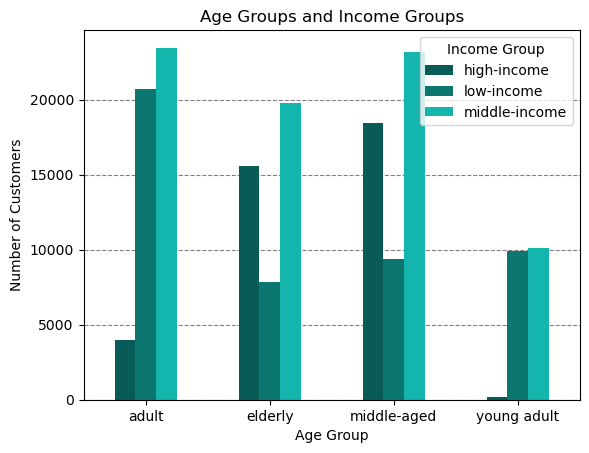

In [378]:
# Create a bar chart for age group and income group comparison
# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD']
# Create the actual bar plot
age_income.plot(x='age_group', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Age Groups and Income Groups')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Income Group', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_income_groups.png'), bbox_inches = 'tight')
plt.show()

### 9.g Age Groups and Loyalty

In [394]:
# Loyalty per Age Group
age_loyalty = df_ords_prods_cust_merge_excl.groupby(['age_group', 'loyalty_flag'])['user_id'].nunique().unstack(fill_value=0)

In [396]:
# Verify Data
age_loyalty.head()

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
adult,4996,20431,22764
elderly,4551,18192,20507
middle-aged,5365,21577,24051
young adult,2105,8550,9542


In [398]:
age_loyalty = age_loyalty.reset_index()

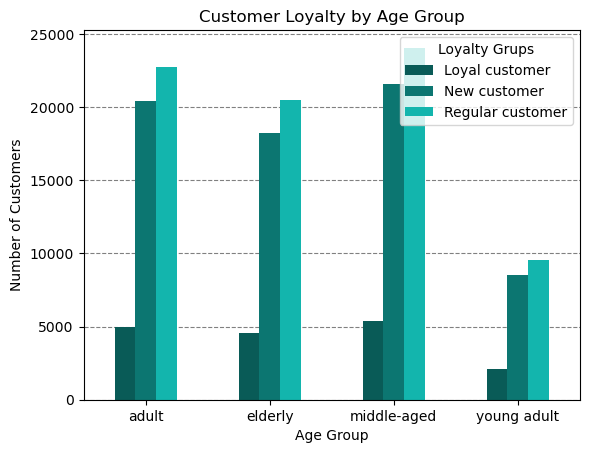

In [400]:
# Create a bar chart for age group and loyalty comparison
# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD']
# Create the actual bar plot
age_loyalty.plot(x='age_group', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Customer Loyalty by Age Group')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Loyalty Grups', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_loyalty_groups.png'), bbox_inches = 'tight')
plt.show()

### 9.h Age Groups and Frequency of Orders

In [353]:
# Create crosstabs for 'age_group', 'frequency_flag' counting unique user_id's
age_freq = df_ords_prods_cust_merge_excl.groupby(['age_group', 'frequency_flag'])['user_id'].nunique().unstack(fill_value=0)

In [355]:
# Verify data
age_freq.head()

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
adult,22489,10818,14884
elderly,20283,9628,13339
middle-aged,23701,11684,15608
young adult,9456,4534,6207


In [357]:
age_freq = age_freq.reset_index()

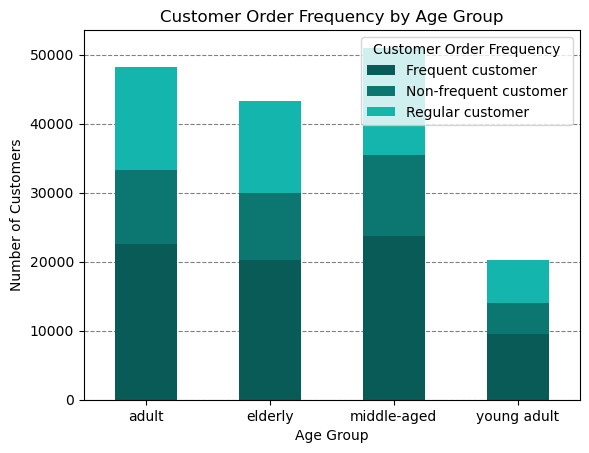

In [363]:
# Create a bar chart for age group and customer frequency flag comparison
# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD']
# Create the actual bar plot
age_freq.plot(x='age_group', kind='bar', stacked=True, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Customer Order Frequency by Age Group')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Customer Order Frequency', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_frequency.png'), bbox_inches = 'tight')
plt.show()

### 9.i Orders by Income Groups

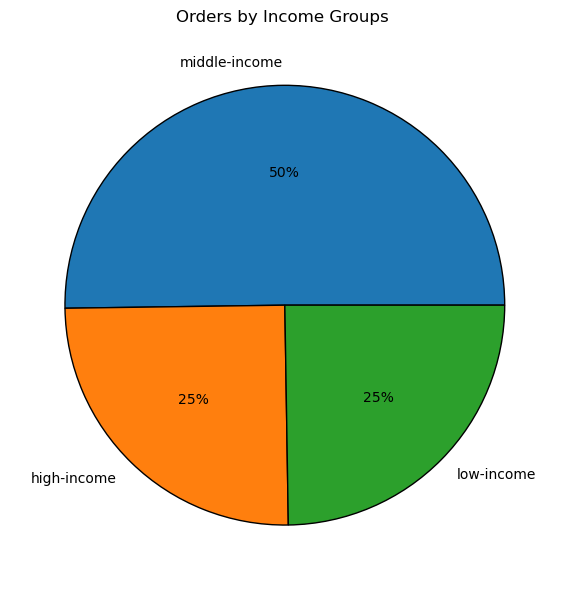

In [424]:
# Get the count for the income_group values
pie_income_group_counts = df_ords_prods_cust_merge_excl['income_group'].value_counts()
# Create a pie chart
plt.figure(figsize=(6,6))
income_group_pie_chart=pie_income_group_counts.plot.pie(autopct='%1.0f%%',wedgeprops={'edgecolor':'black'})
plt.title('Orders by Income Groups ')
plt.ylabel('')
plt.tight_layout()

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'income_distribution.png'), bbox_inches = 'tight')
plt.show()

### 9.j Average Order Amount by Income Group 

In [429]:
df_ords_prods_cust_merge_excl.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price_all_orders', 'spending_flag', 'order_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'nbr_dependents', 'fam_status', 'income', 'region', 'exclusion_flag',
       'age_group', 'income_group'],
      dtype='object')

In [431]:
# First create a data frame which has the total amount of each order
order_amount_cust_2 = df_ords_prods_cust_merge_excl.groupby(['user_id','order_number','income_group'])['prices'].sum().reset_index()

In [433]:
order_amount_cust_2.head()

,user_id,order_number,income_group,prices
0,1,1,low-income,31.6
1,1,2,low-income,35.4
2,1,3,low-income,28.2
3,1,4,low-income,26.0
4,1,5,low-income,57.0


In [437]:
# Rename 'prices' column to 'order_total'
order_amount_cust_2.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [439]:
order_amount_cust_2.head()

,user_id,order_number,income_group,order_total
0,1,1,low-income,31.6
1,1,2,low-income,35.4
2,1,3,low-income,28.2
3,1,4,low-income,26.0
4,1,5,low-income,57.0


In [443]:
ords_amt_income_1 = order_amount_cust_2.groupby('income_group').agg({'order_total':['mean']}) 

In [445]:
ords_amt_income_1.head()

,order_total
,mean
income_group,
high-income,83.911839
low-income,65.241362
middle-income,83.945601


In [449]:
ords_amt_income_1 = ords_amt_income_1.reset_index()

In [543]:
ords_amt_income_1.head()

,income_group,order_total
,,mean
0,high-income,83.911839
1,low-income,65.241362
2,middle-income,83.945601


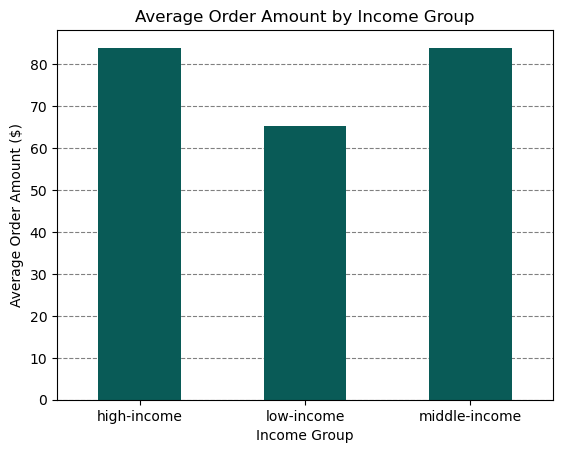

In [547]:
# Create a bar chart for age group and loyalty comparison
# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD']
# Create the actual bar plot
ords_amt_income_1.plot(x='income_group', kind='bar', stacked=False, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Average Order Amount by Income Group')
plt.ylabel('Average Order Amount ($)')
plt.xlabel('Income Group')
plt.xticks(rotation=0)

# Supress the legend
plt.legend().set_visible(False)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Avg order amt- Income grp.png'), bbox_inches = 'tight')
plt.show()

### 9.k Income Groups and Frequency of Orders

In [457]:
# Create crosstabs for 'income_group', 'frequency_flag' counting unique order_id's
income_freq = df_ords_prods_cust_merge_excl.groupby(['income_group', 'frequency_flag'])['order_id'].nunique().unstack(fill_value=0)

In [459]:
income_freq.head()

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
high-income,512112,65660,156466
low-income,569031,95529,191949
middle-income,1025188,133979,314444


In [463]:
income_freq = income_freq.reset_index()

In [465]:
income_freq.head()

frequency_flag,income_group,Frequent customer,Non-frequent customer,Regular customer
0,high-income,512112,65660,156466
1,low-income,569031,95529,191949
2,middle-income,1025188,133979,314444


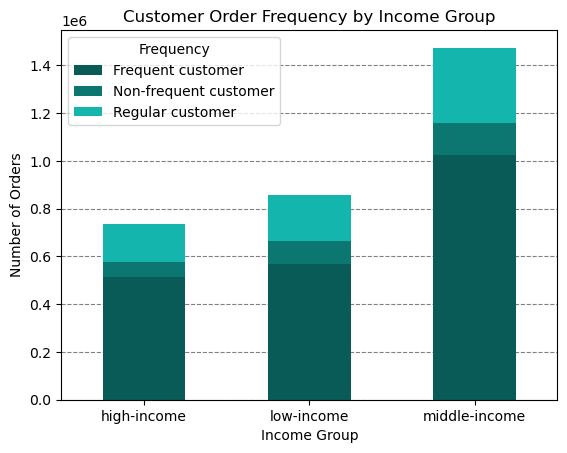

In [549]:
# Create a bar chart for income group and customer frequency
# Create a color palette
custom_palette = ['#095B57','#0C7671','#13B5AD']
# Create the actual bar plot
income_freq.plot(x='income_group', kind='bar', stacked=True, color=custom_palette)

# Display a grid
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Set the title and other formatting
plt.title('Customer Order Frequency by Income Group')
plt.ylabel('Number of Orders')
plt.xlabel('Income Group')
plt.xticks(rotation=0)
plt.legend(title='Frequency', fontsize=10)

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Order freq - income group.png'), bbox_inches = 'tight')
plt.show()